In [ ]:
# Import Libraries needed

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
# Upload / Read file from local directory on certain sheet ('Orders' sheet)

df = pd.read_excel('/content/US_Superstore.xls', sheet_name = 'Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Data Cleansing**

In [ ]:
# Check on the number of columns, rows, and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### From the table above, showed that the table have 21 columns and 9.994 rows and the correct data type for each column.

In [ ]:
# Check if there are null data on the table

df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


### The result shows there are no null data on the table

In [ ]:
# Duplicating data to prepare new table for RFM Analysis

df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Drop columns that will not be used to RFM Analysis

df1.drop(columns=['Ship Mode', 'Region', 'Ship Date', 'Segment', 'Discount', 'Profit', 'Quantity', 'Country', 'City', 'State', 'Postal Code', 'Category', 'Sub-Category', 'Product ID', 'Product Name'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Customer ID    9994 non-null   object        
 4   Customer Name  9994 non-null   object        
 5   Sales          9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 468.6+ KB


In [ ]:
df1.head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Sales
0,1,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,261.9600
1,2,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,731.9400
2,3,CA-2016-138688,2016-06-12,DV-13045,Darrin Van Huff,14.6200
3,4,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,957.5775
4,5,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,22.3680


### Now we have a new table called df1 which ready to use to RFM Analysis

In [ ]:
# Check if there are duplicated data

df1.duplicated().sum()

0

### No duplicated data found

# **RFM Analysis**

In [ ]:
df1.head()

,Row ID,Order ID,Order Date,Customer ID,Customer Name,Sales
0,1,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,261.9600
1,2,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,731.9400
2,3,CA-2016-138688,2016-06-12,DV-13045,Darrin Van Huff,14.6200
3,4,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,957.5775
4,5,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,22.3680


In [ ]:
# Check on min & max date to define the 'today'

print(df1['Order Date'].min())
print(df1['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [ ]:
# Creating RFM Table with reference date 31 December 2024

ref_date = dt.datetime(2017, 12, 31)

rfm = df1.groupby('Customer ID').agg({
    'Order Date' : lambda x: (ref_date - x.max()).days,
    'Order ID' : 'count',
    'Sales' : 'sum'
})

rfm.head()

,Order Date,Order ID,Sales
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


### RFM Table has been created, but we have some to work to do to make up the table to be more readable: rename the header

In [ ]:
# Rename table column header

rfm.rename(columns={
    'Order Date' : 'Recency',
    'Order ID' : 'Frequency',
    'Sales' : 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


In [ ]:
# Create new column for scoring the Recency, Frequency, and Monetary
# The data divided into 5 group using qcut

rfm['R_Score'] = pd.cut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,,,,,,
AA-10315,185,11,5563.560,5,3,5
AA-10375,20,15,1056.390,5,4,2
AA-10480,260,12,1790.512,4,3,3
AA-10645,56,18,5086.935,5,4,5
AB-10015,416,6,886.156,4,1,1


In [ ]:
print(rfm['Monetary'].min())
print(rfm['Monetary'].max())

4.833000000000001
25043.05


### Columns R_Score, F_Score, and M_Score has been created and what to do next is to merge/concatenate the value on each of that 3 columns

In [ ]:
# Another way to define the R_Score, F_Score, and M_Score is based on our own criteria, by creating function first

rfm_own_criteria = rfm.copy()

# Create the function to define R_Score
def calculate_r_score(Recency):
    if Recency <= 30:
        return 5
    elif Recency <= 60:
        return 4
    elif Recency <= 120:
        return 3
    elif Recency <= 180:
        return 2
    else:
        return 1

# Create the function to define F_Score
def calculate_f_score(Frequency):
    if Frequency <= 5:
        return 1
    elif Frequency <= 10:
        return 2
    elif Frequency <= 20:
        return 3
    elif Frequency <= 30:
        return 4
    else:
        return 5


# Create the function to define M_Score
def calculate_m_score(Monetary):
    if Monetary <= 100:
        return 1
    elif Monetary <= 500:
        return 2
    elif Monetary <= 1500:
        return 3
    elif Monetary <= 4500:
        return 4
    else:
        return 5



# Terapkan fungsi ke kolom Recency untuk membuat R_Score
rfm_own_criteria['R_Score'] = rfm_own_criteria['Recency'].apply(calculate_r_score)
rfm_own_criteria['F_Score'] = rfm_own_criteria['Frequency'].apply(calculate_f_score)
rfm_own_criteria['M_Score'] = rfm_own_criteria['Monetary'].apply(calculate_m_score)


rfm_own_criteria.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,,,,,,
AA-10315,185,11,5563.560,1,3,5
AA-10375,20,15,1056.390,5,3,3
AA-10480,260,12,1790.512,1,3,4
AA-10645,56,18,5086.935,4,3,5
AB-10015,416,6,886.156,1,2,3


### Now let's define which one to choose: rfm or rfm_own_criteria? I'll go with the rfm

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,,,,,,
AA-10315,185,11,5563.560,5,3,5
AA-10375,20,15,1056.390,5,4,2
AA-10480,260,12,1790.512,4,3,3
AA-10645,56,18,5086.935,5,4,5
AB-10015,416,6,886.156,4,1,1


In [ ]:
# Merge or concatenate the R_Score, F_Score, and M_Score

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
AA-10315,185,11,5563.560,5,3,5,535
AA-10375,20,15,1056.390,5,4,2,542
AA-10480,260,12,1790.512,4,3,3,433
AA-10645,56,18,5086.935,5,4,5,545
AB-10015,416,6,886.156,4,1,1,411


In [ ]:
# Create function to define customer segmentation

def segment(RFM_score):
    if RFM_score in ['555', '544', '554', '545', '455', '445']:
        return '1. Champions'
    elif RFM_score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return '2. Loyal Customers'
    elif RFM_score in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        return '3. Potential Loyalists'
    elif RFM_score in ['512', '511', '422', '421', '412', '411', '311', '525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413','414', '415', '315', '314','313']:
        return '4. Recent Customers'
    elif RFM_score in ['535', '534', '443', '434', '343', '334', '325', '324','331', '321', '312', '221', '213']:
        return '5. Need Attention'
    elif RFM_score in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124', '155', '154', '144', '214','215','115', '114', '113']:
        return '6. About Risk'
    elif RFM_score in ['332', '322', '231', '241', '251', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        return '7. Hibernating'
    else:
        return '8. Lost'

# Apply the function to create the 'Segment' column
rfm['Segment'] = rfm['RFM_Score'].apply(segment)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
Customer ID,,,,,,,,
AA-10315,185,11,5563.560,5,3,5,535,5. Need Attention
AA-10375,20,15,1056.390,5,4,2,542,3. Potential Loyalists
AA-10480,260,12,1790.512,4,3,3,433,3. Potential Loyalists
AA-10645,56,18,5086.935,5,4,5,545,1. Champions
AB-10015,416,6,886.156,4,1,1,411,4. Recent Customers


In [ ]:
# Creating new table showing total customer for each segment

rfm_segment = rfm['Segment'].value_counts().reset_index()
rfm_segment

,Segment,count
0,4. Recent Customers,295
1,1. Champions,200
2,3. Potential Loyalists,151
3,5. Need Attention,73
4,2. Loyal Customers,51
5,7. Hibernating,14
6,6. About Risk,5
7,8. Lost,4


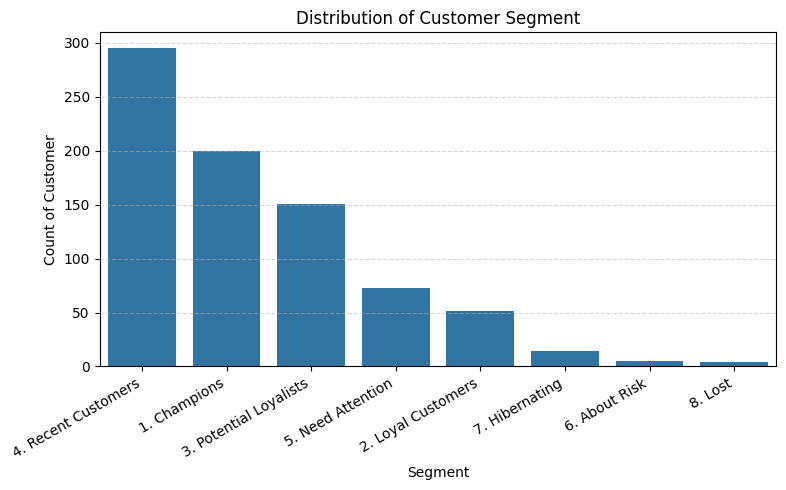

In [ ]:
# Creating bar chart of rfm to know the distribution of each segment

plt.figure(figsize=(8, 5))
sns.barplot(x=rfm_segment['Segment'], y=rfm_segment['count'])
plt.xlabel('Segment')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylabel('Count of Customer')
plt.title('Distribution of Customer Segment')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
segmentation = rfm.groupby('Segment').agg({
    'Recency' : ['mean', 'min', 'max'],
    'Frequency' : ['mean', 'min', 'max'],
    'Monetary' : ['min', 'max', 'mean', 'sum']
}).round(1)

segmentation

Recency            Frequency         Monetary           \
                          mean  min   max      mean min max      min      max   
Segment                                                                         
1. Champions              77.8    1   411      19.8  14  37   2754.2  25043.0   
2. Loyal Customers       112.0    2   582      15.4  12  18   1791.6  19052.2   
3. Potential Loyalists   120.9    1   615      14.0   8  30    385.4   2749.9   
4. Recent Customers      149.8    1   689       7.1   1  10      4.8  14595.6   
5. Need Attention        205.0    6   766      11.3   2  17    758.7  12873.3   
6. About Risk            834.8  720  1036      15.0  12  19   2854.1   9062.9   
7. Hibernating           758.6  482  1001       6.6   3  11    195.0   2550.9   
8. Lost                  930.2  321  1166       8.2   1  25     48.4   4105.3   

                                           
                          mean        sum  
Segment                                    
1. Champions            5451.8  1090360.3  
2. Loyal Customers      3104.5   158328.8  
3. Potential Loyalists  1680.7   253778.6  
4. Recent Customers     1546.8   456308.9  
5. Need Attention       4062.9   296593.0  
6. About Risk           4494.1    22470.5  
7. Hibernating           974.9    13648.8  
8. Lost                 1428.0     5711.9

# **EDA / Visualization**